# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [40]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [42]:
print(api_key)

f9283de7e44649ed859bdf758d2af1b4


In [43]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [75]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(q='bitcoin', from_param='2022-05-01', to='2022-05-13', language='en')

{'status': 'ok',
 'totalResults': 4757,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Arielle Pardes',
   'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
   'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
   'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
   'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
   'publishedAt': '2022-05-10T16:59:46Z',
   'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
   'description': 'Exxo

In [45]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ether_headlines = newsapi.get_everything(q='ethereum', from_param='2022-05-01', to='2022-05-13', language='en')

In [46]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
4,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807


In [47]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ether_sentiments = []

for article in ether_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ether_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ether_df = pd.DataFrame(ether_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ether_df = ether_df[cols]

ether_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,2022-05-01,There's a new metaverse project from the creat...,-0.2732,0.000,0.063,0.937
4,2022-05-09,Editorial IndependenceWe want to help you make...,0.6908,0.178,0.000,0.822


In [49]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.157065,0.052050,0.089000,0.858950
std,0.405872,0.062562,0.079384,0.092585
min,-0.817600,0.000000,0.000000,0.557000
25%,-0.396450,0.000000,0.045000,0.840250
50%,-0.300050,0.039000,0.071500,0.888000
75%,0.133600,0.085000,0.128000,0.917000
max,0.750600,0.202000,0.279000,0.964000


In [50]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ether_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.128485,0.030450,0.057800,0.911800
std,0.387373,0.051181,0.051568,0.052298
min,-0.718400,0.000000,0.000000,0.822000
25%,-0.366350,0.000000,0.000000,0.875500
50%,-0.249750,0.000000,0.063000,0.925500
75%,0.025675,0.049250,0.075500,0.938000
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [52]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [54]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [110]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text

    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return tokens


In [124]:
bitcoin1_df = pd.DataFrame.from_dict(bitcoin_headlines["articles"])

ether1_df = pd.DataFrame.from_dict(ether_headlines["articles"])
content_btc = bitcoin1_df['content']
content_eth = ether1_df['content']

for rows in content_btc:
    token = tokenizer(rows)
    bitcoin1_df['tokenized'] = token



ValueError: Length of values (19) does not match length of index (20)

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [112]:
from collections import Counter
from nltk import ngrams

In [125]:
tokens_btc = []
for rows in content_btc:
    tokens_btc.extend(tokenizer(rows))
    
tokens_eth = []
for row in content_eth:
    tokens_eth.extend(tokenizer(row))

In [122]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigram_counts_btc = Counter(ngrams(tokens_btc, n=2))
print(dict(bigram_counts_btc))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'char'): 2, ('char', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', '

In [129]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counts_eth = Counter(ngrams(tokens_eth, n=2))
print(dict(bigram_counts_eth))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'char'): 1, ('char', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'ha'): 1, ('ha', 'apologised'): 1, ('apologised', 'user'): 1, ('user', 'sale'): 1, ('sale', 'metaverse'): 1, ('metaverse', 'land'): 1, ('land', 'sparked'): 1, ('sparked', 'frenzy'): 1, ('frenzy', 'temporarily'): 1, ('temporarily', 'brought'): 1, ('brought', 'ethereum'): 1, ('ethereum', 'cryptocurrencyyuga'): 1, ('cryptocurrencyyuga', 'labs'): 1, ('labs', 'comp'): 1, ('comp', 'ch

In [127]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [130]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE! bigram_counts_btc
token_count(tokens_btc, N=10)

[('char', 15),
 ('bitcoin', 12),
 ('cryptocurrency', 11),
 ('may', 7),
 ('world', 6),
 ('week', 6),
 ('reuters', 6),
 ('ha', 5),
 ('biggest', 5),
 ('posted', 5)]

In [132]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(tokens_eth, N=10)

[('char', 20),
 ('bitcoin', 9),
 ('cryptocurrency', 8),
 ('may', 7),
 ('ha', 5),
 ('last', 5),
 ('week', 5),
 ('reuters', 5),
 ('ethereum', 4),
 ('nft', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [139]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [148]:
big_string1 = ' '.join(tokens_btc)
input_text_btc = process_text(big_string1)
input_text_btc

'even though number womenfocused crypto space odeniran say woman still underrepresented ive space im black person woman b char bitcoin mining site powered otherwise lost gas oil well near linden texas april th photo francois picardafp via getty image corporate climate hype fl char warren buffett ha always bitcoin skeptic billionaire investor harsh word yet cryptocurrency weekend buffett made clear opposition crypt char image source getty imagesthe value bitcoin continued fall weekend dropped according coinbase cryptocurrency exchangethe world largest cryp char youve ever felt like introducing vegasstyle odds retirement plan youre finally lucklast week fidelity investment announced would allow investor put part char cryptocurrency mixer sometimes used help online criminal launder stolen money hiding true origin u treasury ready clamp hostile government char btc fell lowest level since last july price dropped start week selloff cryptocurrency started last week following fed decision hike

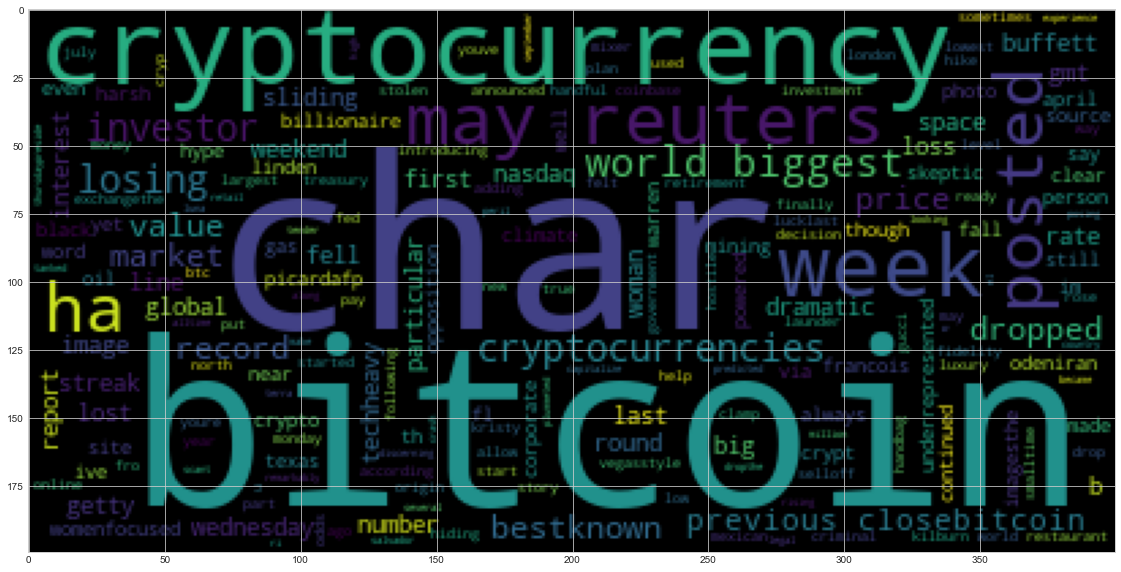

In [149]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(input_text)
plt.imshow(wc)

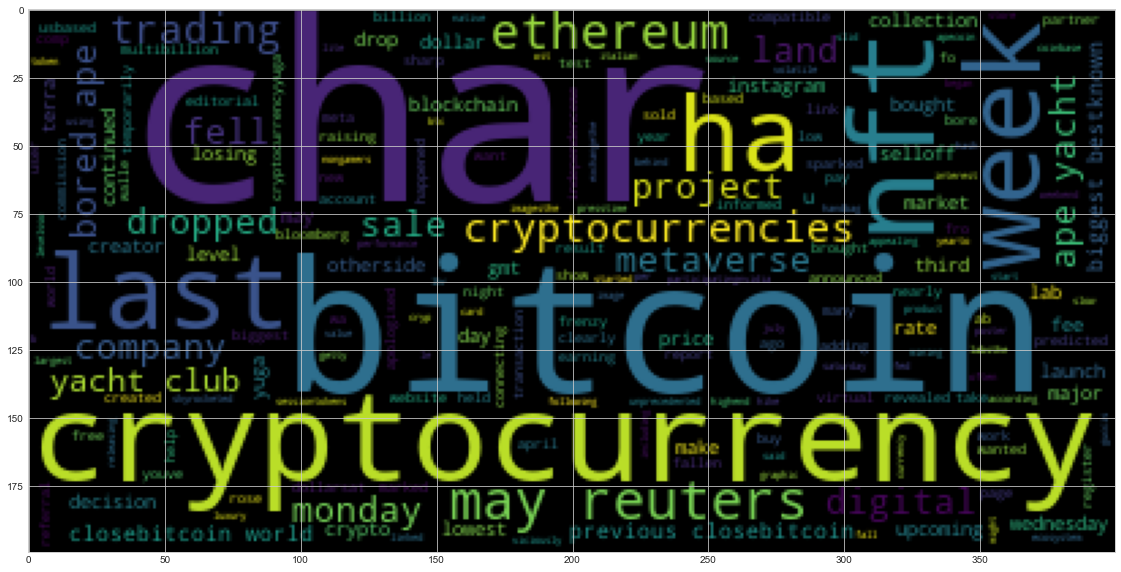

In [150]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
big_string2 = ' '.join(tokens_eth)
input_text_eth = process_text(big_string2)
wc = WordCloud().generate(input_text_eth)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [145]:
import spacy
from spacy import displacy

In [146]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [147]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [154]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [155]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_btc = nlp(input_text_btc)
# Add a title to the document
# YOUR CODE HERE!


In [156]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_btc, style='ent')

In [158]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc_btc.ents])

['linden', 'texas', 'april', 'warren buffett', 'weekend buffett', 'fall weekend', 'week', 'fidelity investment', 'u treasury', 'last july', 'week', 'last week', 'reuters', 'wednesday', 'year', 'gucci', 'round week', 'reuters', 'wednesday', 'reuters', 'monday', 'mexican', 'london week ago', 'luna', 'reuters', 'el salvador', 'first', 'september', 'million', 'early friday', 'reuters block inc sqn', 'jack dorsey', 'thursday', 'first quarter', 'hong kong', 'reuters', 'australian', 'canadian', 'tuesday']


---

### Ethereum NER

In [159]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [160]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_eth = nlp(input_text_eth)
# Add a title to the document
# YOUR CODE HERE!

In [161]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_btc, style='ent')

In [162]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc_eth.ents])

['meta', 'multibillion dollar', 'april', 'last night', 'bloomberg', 'ab char', 'char day ago', 'third', 'week', 'reuters', 'wednesday', 'year', 'reuters', 'wednesday', 'reuters', 'monday', 'last week', 'last july', 'week', 'last week', 'monday', 'fall weekend', 'reuters', 'italian', 'saturday', 'week', 'first', 'hong kong', 'reuters', 'january monday']


---